### Import modules

In [4]:
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile
import matplotlib.image as mpimg

In [5]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dropout,Dense,Flatten
from keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50

### Load The Base Model

In [6]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3),pooling='avg',classes=4)

In [4]:
with ZipFile('dataset.zip',"r") as zip_ref:
    zip_ref.extractall()

In [30]:
print(os.listdir('dataset'))

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']


In [6]:
print(len(os.listdir("dataset/cataract")))

1039


(512, 512, 3)


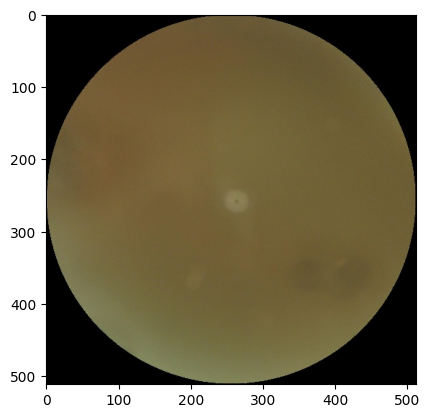

In [7]:
img_path='dataset/cataract/0_left.jpg'
img=mpimg.imread(img_path)
print(img.shape)
plt.imshow(img)
plt.show()

### Train and Validation Generator

In [7]:
train_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    'dataset',
    validation_split=0.2,
    subset="training",
    label_mode='categorical',
    image_size=(224,224),
    batch_size=32)

Found 4218 files belonging to 4 classes.
Using 3375 files for training.


In [8]:
validation_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    'dataset',
    validation_split=0.2,
    subset="validation",
    label_mode='categorical',
    image_size=(224,224),
    batch_size=32)

Found 4218 files belonging to 4 classes.
Using 843 files for validation.


### Model Architecture

In [11]:
resnet_model=Sequential()
for layer in base_model.layers:
    layer.trainable=False
resnet_model.add(base_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(1024,activation='relu'))
resnet_model.add(Dense(4,activation='softmax'))

In [12]:
resnet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           4,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,689,988 (98.00 MB)

 Trainable params: 2,102,276 (8.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [13]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
history=resnet_model.fit(train_dataset,validation_data=validation_dataset,epochs=10)

Epoch 1/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 305s 3s/step - accuracy: 0.8845 - loss: 0.3193 - val_accuracy: 0.8909 - val_loss: 0.3043
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 291s 3s/step - accuracy: 0.9093 - loss: 0.2443 - val_accuracy: 0.8873 - val_loss: 0.3102
Epoch 3/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 292s 3s/step - accuracy: 0.9039 - loss: 0.2455 - val_accuracy: 0.8944 - val_loss: 0.2843
Epoch 4/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 290s 3s/step - accuracy: 0.9201 - loss: 0.2213 - val_accuracy: 0.9134 - val_loss: 0.2462
Epoch 5/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 290s 3s/step - accuracy: 0.9323 - loss: 0.1764 - val_accuracy: 0.8944 - val_loss: 0.2822
Epoch 6/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 291s 3s/step - accuracy: 0.9350 - loss: 0.1667 - val_accuracy: 0.8897 - val_loss: 0.3205
Epoch 7/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 290s 3s/step - accuracy: 0.9344 - loss: 0.1629 - val_accuracy: 0.9027 - val_loss: 0.2581
Epoch 8/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 291s 3s/step - accuracy: 0.9459 - loss: 0.1268 - val_accu

### Saving the Model

In [15]:
model_json = resnet_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
resnet_model.save_weights("model.weights.h5")

NameError: name 'resnet_model' is not defined

### Saving the model History

In [20]:
import json
with open('training_history.json', 'w') as f: 
    json.dump(history.history,f)

### Accessing the Model History

In [22]:
import json 
with open('training_history.json', 'r') as f: 
    history = json.load(f) 

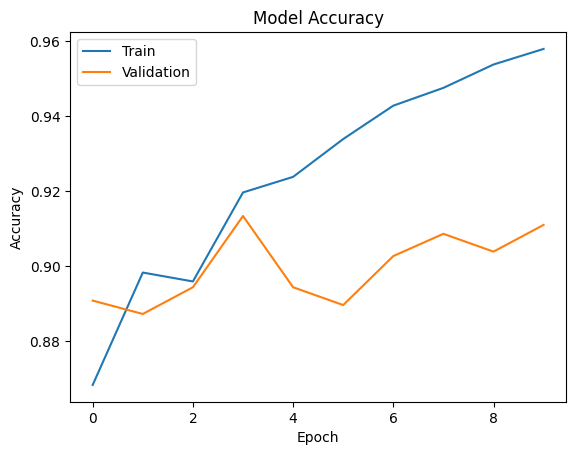

In [23]:
plt.plot(history['accuracy']) 
plt.plot(history['val_accuracy']) 
plt.title('Model Accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

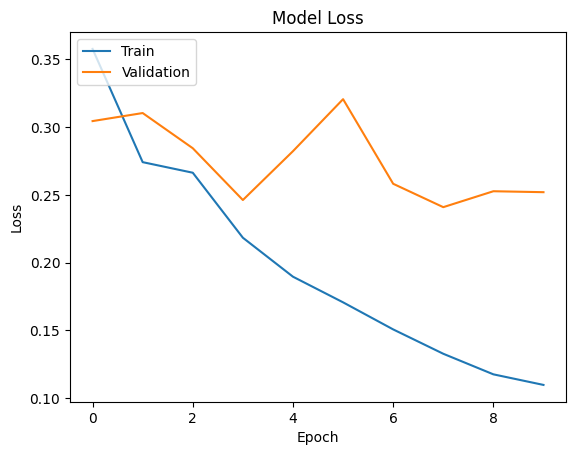

In [24]:
plt.plot(history['loss']) 
plt.plot(history['val_loss']) 
plt.title('Model Loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [10]:
import random
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from keras.models import model_from_json

### Extracting the model

In [11]:
json_file = open('model.json', 'r')
model_json = json_file.read()
json_file.close()
loaded_resnet_model = model_from_json(model_json)
loaded_resnet_model.load_weights("model.weights.h5")

### Model Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


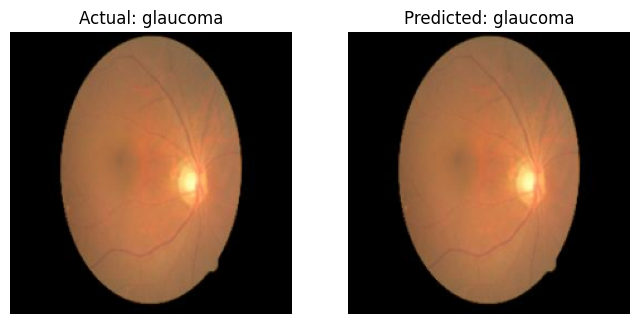

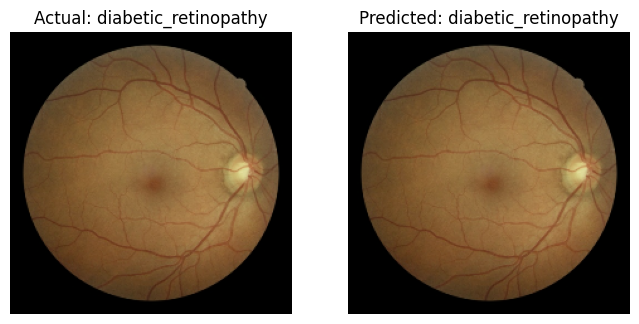

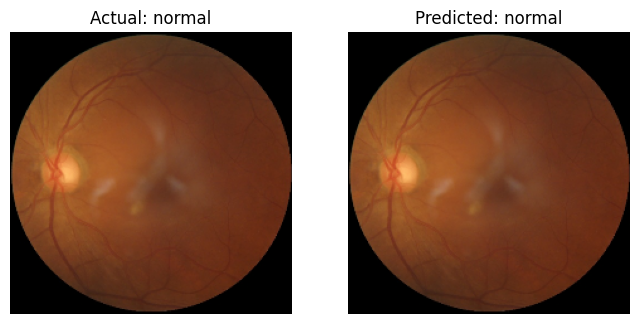

In [13]:
tf.experimental.numpy.experimental_enable_numpy_behavior()
classes=['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
images,labels=next(iter(validation_dataset))
predictions=loaded_resnet_model.predict(images)
sample_indices = np.random.choice(range(len(images)), 3, replace=False)
for i in sample_indices:
        actual_label = classes[np.argmax(labels[i])]
        predicted_label = classes[np.argmax(predictions[i])]
        plt.figure(figsize=(8, 4))
        # Actual Image
        plt.subplot(1, 2, 1)
        plt.imshow(images[i].astype(np.uint8))  
        plt.title(f'Actual: {actual_label}')
        plt.axis('off')
        # Predicted Image
        plt.subplot(1, 2, 2)
        plt.imshow(images[i].astype(np.uint8))  
        plt.title(f'Predicted: {predicted_label}')
        plt.axis('off')
        plt.show()

### Class Prediction from images

In [31]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array
def predict_disease(img_path, model): 
    img_array = preprocess_image(img_path) 
    prediction = model.predict(img_array) 
    predicted_class = np.argmax(prediction)
    # print(prediction,predicted_class)
    acc_percentage=100*prediction[0][predicted_class]
    return predicted_class,acc_percentage

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


(-0.5, 511.5, 511.5, -0.5)

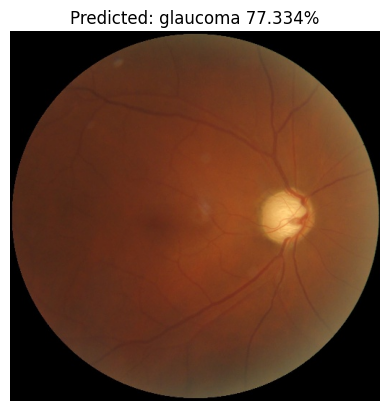

In [45]:
img_path='Testdata/glaucoma/1216_right.jpg'
predicted_class,acc_percent = predict_disease(img_path, loaded_resnet_model)
img=mpimg.imread(img_path)
plt.imshow(img)
plt.title(f'Predicted: {classes[predicted_class]} {acc_percent:.3f}%')
plt.axis('off')